In [1]:
# Import needed packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_csv('MysteryData/Mystery5.data', header=None)

# Picture 5

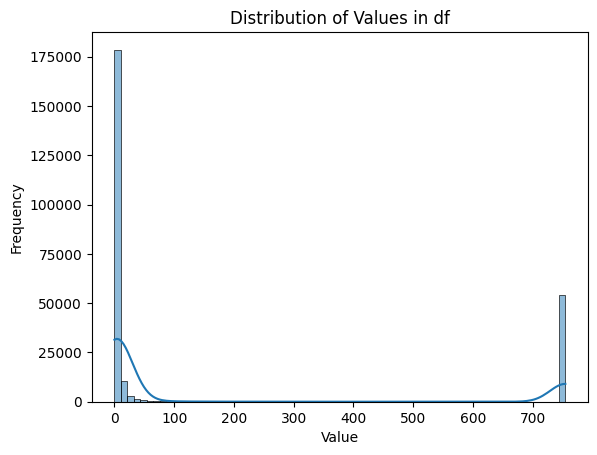

In [3]:
# pic 5
# Flatten the DataFrame to 1D if it's multi-dimensional (to avoid complications)
df_flat = df.values.flatten()

# Plot histogram using seaborn
sns.histplot(df_flat, bins=70, kde=True)  # kde=True adds a smooth curve
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values in df')
plt.show()

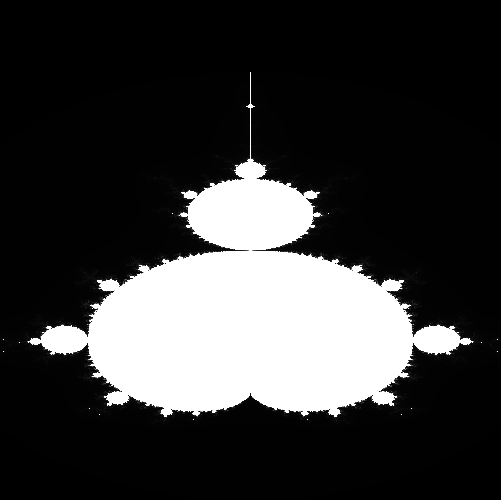

In [4]:
# pic 5

import numpy as np
from PIL import Image

# Load the .data file with comma as the delimiter
data = np.loadtxt('MysteryData/Mystery5.data', delimiter=',')  # Specify the delimiter

# Step 2: Normalize data to ensure values fall within the 0-255 range for grayscale
min_val = df_flat.min()
max_val = df_flat.max()

# Normalize data to 0-255
normalized_data = (data - min_val) / (max_val - min_val) * 255


# Step 3: Convert to an image
image = Image.fromarray(np.uint8(normalized_data), 'L')  # 'L' mode for grayscale image

# Step 4: Save as PNG or JPG
image.save('output_image5.png')
display(image)

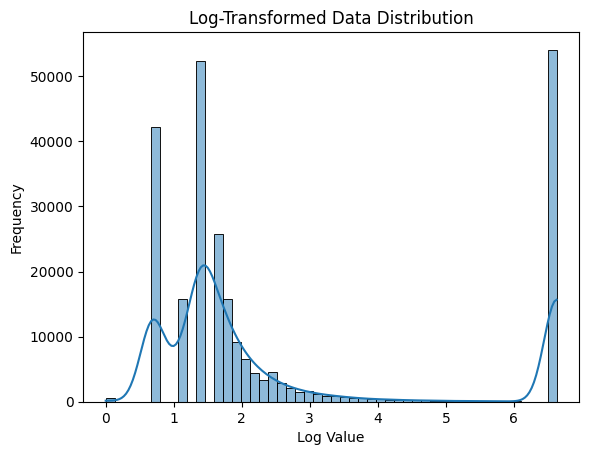

In [5]:
# pic 5 
# Apply log transformation (add small constant to avoid log(0))
log_transformed_data = np.log1p(df_flat)  # log1p(x) = log(1 + x) to handle zeros

# Plot histogram of log-transformed data
sns.histplot(log_transformed_data.flatten(), bins=50, kde=True)
plt.title('Log-Transformed Data Distribution')
plt.xlabel('Log Value')
plt.ylabel('Frequency')
plt.show()


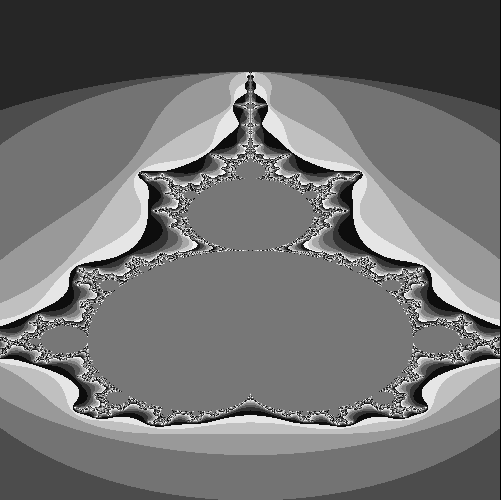

In [6]:
# pic 5
# Step 2: Normalize data to ensure values fall within the 0-255 range for grayscale
min_val = log_transformed_data.min()
max_val = log_transformed_data.max()

# Normalize data to 0-255
normalized_data = (data - min_val) / (max_val - min_val) * 255


# Step 3: Convert to an image
image = Image.fromarray(np.uint8(normalized_data), 'L')  # 'L' mode for grayscale image

# Step 4: Save as PNG or JPG
image.save('output_image5_log.png')
display(image)

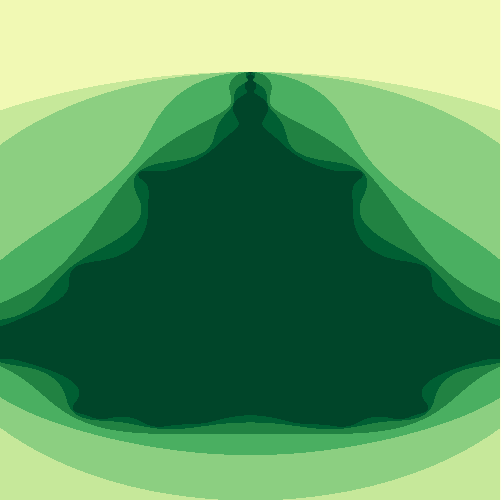

In [7]:
# add color
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Load your normalized data (already normalized from 0 to 255)

# Step 2: Apply a colormap using matplotlib
colormap = plt.get_cmap('YlGn')  # You can try other colormaps like 'plasma', 'inferno', 'jet', etc.
colored_data = colormap(normalized_data / 255.0)  # Normalizing to [0, 1] for colormap

# Step 3: Convert to an RGB image (ignore the alpha channel returned by the colormap)
rgb_data = (colored_data[:, :, :3] * 255).astype(np.uint8)  # Remove alpha channel and convert to 0-255 range

# Step 4: Convert to a PIL image and save
image = Image.fromarray(rgb_data)
image.save('output5_color1.png')
display(image)

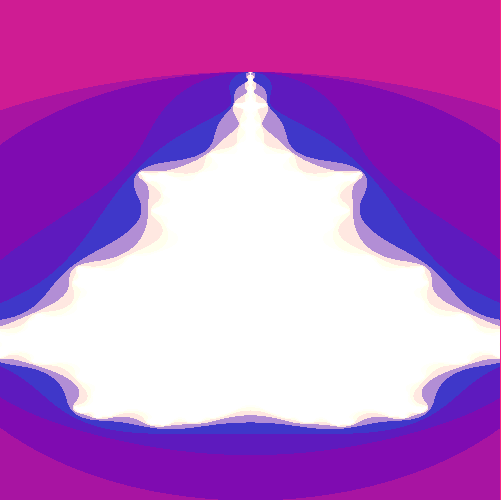

In [8]:
import numpy as np
from PIL import Image
from IPython.display import display

# Define custom color mapping with shades
color_mapping = {
    'section1_start': (247, 37, 133),    # hot pink
    'section1_end': (181, 23, 158),          # purple
    
    'section2_start': (181, 23, 158),          # purple
    'section2_end': (114, 9, 183),        # DARK PURPLE
    
    'section3_start': (114, 9, 183),        # DARK PURPLE
    'section3_end': (63, 55, 201),        # blue
    
    'section4_start': (63, 55, 201),        # blue
    'section4_end': (255, 200, 221),          # pink
}

# Define the function to map grayscale values to these colors
def grayscale_to_rgb(value):
    if value < 64:  # Section 1
        factor = value / 64
        color1 = color_mapping['section1_start']
        color2 = color_mapping['section1_end']
    elif value < 128:  # Section 2
        factor = (value - 64) / 64
        color1 = color_mapping['section2_start']
        color2 = color_mapping['section2_end']
    elif value < 192:  # Section 3
        factor = (value - 128) / 64
        color1 = color_mapping['section3_start']
        color2 = color_mapping['section3_end']
    else:  # Section 4
        factor = (value - 192) / 63
        color1 = color_mapping['section4_start']
        color2 = color_mapping['section4_end']  
        
    red = int(color1[0] * (1 - factor) + color2[0] * factor)
    green = int(color1[1] * (1 - factor) + color2[1] * factor)
    blue = int(color1[2] * (1 - factor) + color2[2] * factor)

    # Clamp values to the range 0-255
    red = max(0, min(255, red))
    green = max(0, min(255, green))
    blue = max(0, min(255, blue))
    
    
    return (red, green, blue)



# Apply color mapping
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data], dtype=np.uint8)

# Convert to an image
image = Image.fromarray(rgb_data)

# Save the image
image_path = 'output5_custom1.png'
image.save(image_path)

# Display the image
display(image)


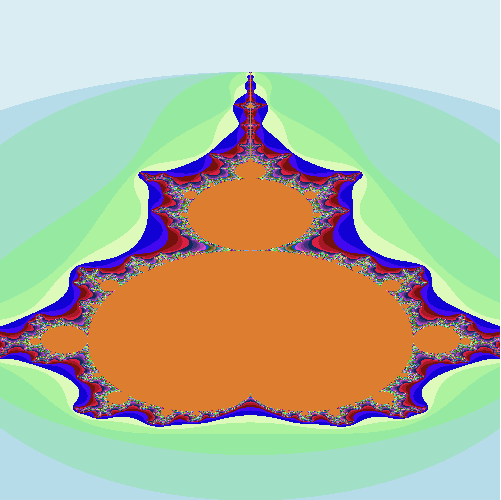

In [9]:
# asked chatGPT for pastel color scheme
# Step 1: Define your custom pastel color mapping function
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a light pastel blue (173, 216, 230)
        # Interpolating between white (255,255,255) and light blue (173, 216, 230)
        red = int(255 - (82 * (value / 85)))  # Decrease red from 255 to 173
        green = int(255 - (39 * (value / 85)))  # Decrease green from 255 to 216
        blue = int(255 - (25 * (value / 85)))  # Decrease blue from 255 to 230
    elif value < 170:  # Mid-range values map to light pastel green (144, 238, 144)
        # Interpolating between light blue (173, 216, 230) and pastel green (144, 238, 144)
        red = int(173 - (29 * ((value - 85) / 85)))  # Decrease red from 173 to 144
        green = int(216 + (22 * ((value - 85) / 85)))  # Increase green from 216 to 238
        blue = int(230 - (86 * ((value - 85) / 85)))  # Decrease blue from 230 to 144
    else:  # High values map to pastel yellow (255, 255, 204)
        # Interpolating between pastel green (144, 238, 144) and pastel yellow (255, 255, 204)
        red = int(144 + (111 * ((value - 170) / 85)))  # Increase red from 144 to 255
        green = int(238 + (17 * ((value - 170) / 85)))  # Increase green from 238 to 255
        blue = int(144 + (60 * ((value - 170) / 85)))  # Increase blue from 144 to 204
    return (red, green, blue)

# Step 2: Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Step 3: Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output5_custom2.png')
display(image)


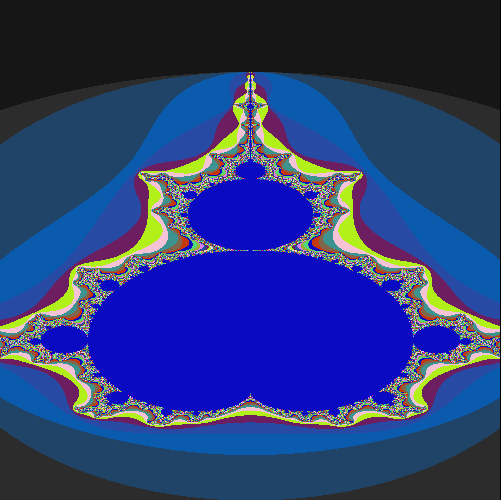

In [10]:
# Define the custom futuristic iron-punk color mapping function
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to metallic dark gray (50, 50, 50)
        # Interpolating between black (0,0,0) and dark metallic gray (50, 50, 50)
        red = int(0 + (50 * (value / 85)))  # Increase red from 0 to 50
        green = int(0 + (50 * (value / 85)))  # Increase green from 0 to 50
        blue = int(0 + (50 * (value / 85)))  # Increase blue from 0 to 50
    elif value < 170:  # Mid-range values map to neon blue (0, 102, 204)
        # Interpolating between dark gray (50, 50, 50) and neon blue (0, 102, 204)
        red = int(50 - (50 * ((value - 85) / 85)))  # Decrease red from 50 to 0
        green = int(50 + (52 * ((value - 85) / 85)))  # Increase green from 50 to 102
        blue = int(50 + (154 * ((value - 85) / 85)))  # Increase blue from 50 to 204
    else:  # High values map to cold metallic red (153, 0, 51) and purple (102, 0, 153)
        # Interpolating between neon blue (0, 102, 204) and cold metallic red/purple (153, 0, 51)
        red = int(0 + (153 * ((value - 170) / 85)))  # Increase red from 0 to 153
        green = int(102 - (102 * ((value - 170) / 85)))  # Decrease green from 102 to 0
        blue = int(204 - (153 * ((value - 170) / 85)))  # Decrease blue from 204 to 51
    return (red, green, blue)

# Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output5_custom3.png')
display(image)


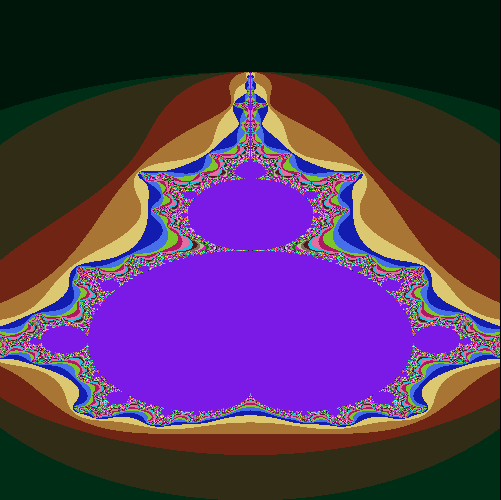

In [11]:
# Define the custom forest-themed color mapping function
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to deep forest green (0, 51, 25)
        # Interpolating between black (0,0,0) and deep forest green (0, 51, 25)
        red = int(0 + (0 * (value / 85)))  # Stay at 0 for red
        green = int(0 + (51 * (value / 85)))  # Increase green from 0 to 51
        blue = int(0 + (25 * (value / 85)))  # Increase blue from 0 to 25
    elif value < 170:  # Mid-range values map to earthy brown (139, 69, 19)
        # Interpolating between forest green (0, 51, 25) and earthy brown (139, 69, 19)
        red = int(0 + (139 * ((value - 85) / 85)))  # Increase red from 0 to 139
        green = int(51 - (18 * ((value - 85) / 85)))  # Decrease green from 51 to 69
        blue = int(25 - (6 * ((value - 85) / 85)))  # Decrease blue from 25 to 19
    else:  # High values map to light forest sunlight yellow (255, 255, 153)
        # Interpolating between earthy brown (139, 69, 19) and sunlight yellow (255, 255, 153)
        red = int(139 + (116 * ((value - 170) / 85)))  # Increase red from 139 to 255
        green = int(69 + (186 * ((value - 170) / 85)))  # Increase green from 69 to 255
        blue = int(19 + (134 * ((value - 170) / 85)))  # Increase blue from 19 to 153
    return (red, green, blue)

# Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output5_custom4.png')
display(image)


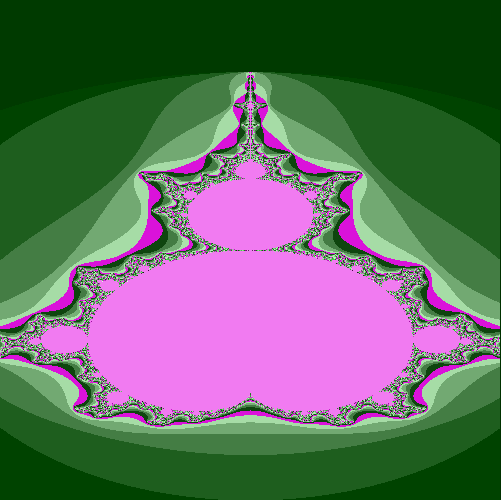

In [12]:
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to dark green (0, 50, 0)
        # Interpolating between dark green (0, 50, 0) and a darker green
        red = int(0)  # Stay at 0 for red
        green = int(50 + (20 * (value / 85)))  # Increase green from 50 to 70
        blue = int(0)  # Stay at 0 for blue
    elif value < 170:  # Mid-range values map to various shades of green
        # Interpolating between dark green (0, 70, 0) and medium green (85, 139, 85)
        red = int(0 + (85 * ((value - 85) / 85)))  # Increase red from 0 to 85
        green = int(70 + (69 * ((value - 85) / 85)))  # Increase green from 70 to 139
        blue = int(0 + (85 * ((value - 85) / 85)))  # Increase blue from 0 to 85
    else:  # High values map to very light green with a touch of pink
        # Interpolating between light green (85, 139, 85) and very light green with a hint of pink (200, 255, 200)
        red = int(85 + (115 * ((value - 170) / 85)))  # Increase red from 85 to 200
        green = int(139 + (116 * ((value - 170) / 85)))  # Increase green from 139 to 255
        blue = int(85 + (115 * ((value - 170) / 85)))  # Increase blue from 85 to 200
    return (red, green, blue)


# Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output5_custom5.png')
display(image)


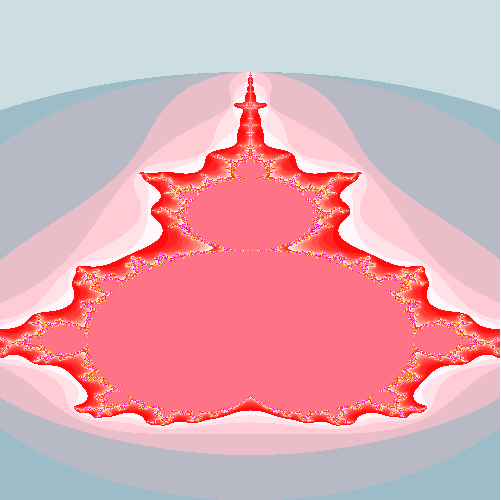

In [13]:
# Define the cozy town house theme color mapping function
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a soft pastel pink (255, 182, 193)
        # Interpolating between white (255, 255, 255) and soft pastel pink (255, 182, 193)
        red = int(255 - (110 * (value / 85)))  # Decrease red from 255 to 145
        green = int(255 - (73 * (value / 85)))  # Decrease green from 255 to 182
        blue = int(255 - (62 * (value / 85)))  # Decrease blue from 255 to 193
    elif value < 170:  # Mid-range values map to a warm pink (255, 192, 203)
        # Interpolating between soft pastel pink (255, 182, 193) and warm pink (255, 192, 203)
        red = int(145 + (110 * ((value - 85) / 85)))  # Increase red from 145 to 255
        green = int(182 + (10 * ((value - 85) / 85)))  # Increase green from 182 to 192
        blue = int(193 + (10 * ((value - 85) / 85)))  # Increase blue from 193 to 203
    else:  # High values map to a very light pastel pink (255, 240, 245)
        # Interpolating between warm pink (255, 192, 203) and very light pastel pink (255, 240, 245)
        red = int(255)  # Stay at 255 for red
        green = int(192 + (48 * ((value - 170) / 85)))  # Increase green from 192 to 240
        blue = int(203 + (42 * ((value - 170) / 85)))  # Increase blue from 203 to 245
    return (red, green, blue)

# Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output5_custom6.png')
display(image)


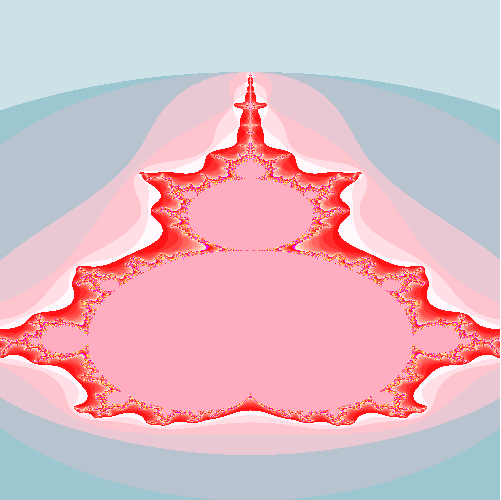

In [14]:
# Define the cozy town house theme color mapping function with reversed pink and blue hints
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a warm pink (255, 192, 203)
        # Interpolating between white (255, 255, 255) and warm pink (255, 192, 203)
        red = int(255 - (110 * (value / 85)))  # Decrease red from 255 to 145
        green = int(255 - (63 * (value / 85)))  # Decrease green from 255 to 192
        blue = int(255 - (52 * (value / 85)))  # Decrease blue from 255 to 203
    elif value < 170:  # Mid-range values map to a soft pastel pink (255, 182, 193)
        # Interpolating between warm pink (255, 192, 203) and soft pastel pink (255, 182, 193)
        red = int(145 + (110 * ((value - 85) / 85)))  # Increase red from 145 to 255
        green = int(192 + (10 * ((value - 85) / 85)))  # Increase green from 192 to 202
        blue = int(203 + (10 * ((value - 85) / 85)))  # Increase blue from 203 to 213
    else:  # High values map to a very light pastel pink (255, 240, 245)
        # Interpolating between soft pastel pink (255, 182, 193) and very light pastel pink (255, 240, 245)
        red = int(255)  # Stay at 255 for red
        green = int(182 + (58 * ((value - 170) / 85)))  # Increase green from 182 to 240
        blue = int(193 + (52 * ((value - 170) / 85)))  # Increase blue from 193 to 245
    return (red, green, blue)

# Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output5_custom7.png')
display(image)


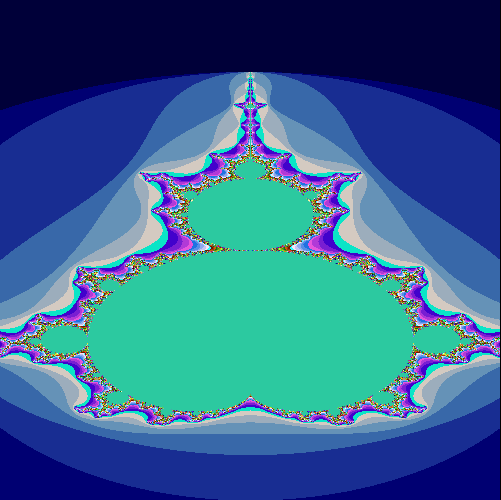

In [15]:
# Define the blue theme color mapping function with hints of silver
def grayscale_to_rgb(value):
    if value < 85:  # Low values map to a deep navy blue (0, 0, 128)
        # Interpolating between black (0,0,0) and deep navy blue (0, 0, 128)
        red = 0
        green = 0
        blue = int(128 * (value / 85))  # Gradually increase blue from 0 to 128
    elif value < 170:  # Mid-range values map to a medium blue (70, 130, 180)
        # Interpolating between deep navy blue (0, 0, 128) and medium blue (70, 130, 180)
        red = int(70 * ((value - 85) / 85))  # Increase red from 0 to 70
        green = int(130 * ((value - 85) / 85))  # Increase green from 0 to 130
        blue = int(128 + (52 * ((value - 85) / 85)))  # Increase blue from 128 to 180
    else:  # High values map to a light silver blue (192, 192, 192)
        # Interpolating between medium blue (70, 130, 180) and light silver blue (192, 192, 192)
        red = int(70 + (122 * ((value - 170) / 85)))  # Increase red from 70 to 192
        green = int(130 + (62 * ((value - 170) / 85)))  # Increase green from 130 to 192
        blue = int(180 + (12 * ((value - 170) / 85)))  # Increase blue from 180 to 192
    return (red, green, blue)

# Apply the mapping to the entire dataset
rgb_data = np.array([[grayscale_to_rgb(int(pixel)) for pixel in row] for row in normalized_data])

# Convert to an image and save
image = Image.fromarray(np.uint8(rgb_data))
image.save('output5_custom8.png')
display(image)
